<html>
  <h1 align="center";> Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
  </h1>
<hr>
  <h3 align="center";>
  Edición 2022
  </h3>
<hr>
  <h1 align="center";>
  Llamados Atendidos de Violencia Familiar Unificado con Series Temporales
  </h1>
<hr>
  <h2 align="center";>
  Trabajo Práctico 1 - Análisis y Visualización
  </h2>
</html>

## Mentora:
- Isabel Rivadero

## Integrantes:
- Kunzmann, Natalia
- Rinaudo, Eleana
- Sulca, Anahí

## Descripción

Los datos corresponden a información recopilada correspondiente a los llamados de todo el país atendidos por los y las profesionales del 137 sobre casos de Violencia Familiar desde Enero de 2017 hasta Febrero del 2022 organizados de manera unificada.

Pueden consultar en:
[Dataset Línea 137 - Victimas de Violencia Familiar](http://datos.jus.gob.ar/dataset/linea-137-victimas-de-violencia-familiar)

El dataset contiene información de:
-  `id`
- `descripcion del llamante`
- `género del llamante`
- `tipo de violencia`
- `género de la víctima`
- `cantidad de victimas`
- `cantidad de agresores`
- `género del agresor`
- `relación con la víctima`
- `fecha`
- `hora de la llamada`.

Repositorio con los datos listos para procesar:
- [Repositorio Mentoría](https://github.com/IsabelRivadero/ir-mentoria2022)

---
## Objetivo

Realizar el **análisis**, **cuantificar variables** y describir las relaciones existentes y de interés presentes en la información recopilada sobre casos de Violencia
Familiar.

Elaborar **visualizaciones** para entender mejor estas relaciones.

---
## Consignas:

1. Realizar análisis de cada columna por separado, de las combinaciones de columnas que tengan sentido dos a dos y porque les parece que tienen sentido. Si alguna relación de más de dos columnas les parece interesante,
justificar porqué y analizar.
(Excluir los datos de fechas y horas por el momento)
El análisis total debe incluir: Análisis de tipos, Conteos, Promedios, Mediana y Moda cuando correspondan los tipos de datos, con una breve descripción de lo que
se observa.

2. Visualizaciones para las relaciones que tengan información que consideren
de importancia. Al pie de cada gráfico describir lo que se observa.


---
## A modo de guía buscar responder las siguientes preguntas con el análisis:
- ¿De qué género son los/las denunciantes?
- ¿Qué relación existe con el/la agresor?  
- ¿Qué vínculo existe entre la víctima con el llamante? 
- ¿Cuál es la relación entre la derivación de la llamada y el llamante? 
- ¿Cuál es la cantidad de víctimas/agresores?

<html>
<hr>
  <h1 align="center";>
  Desarrollo
  </h1>
</html>

## Importación de librerías

Importamos la librerías que vamos a utilizar en la Mentoría.

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20)
sns.set_context("talk")


## Lectura del dataset

Detalle de los llamados de todo el país atendidos por las y los profesionales de la Línea 137, de alcance nacional, sobre casos de Violencia Familiar. La unidad de análisis en este recurso es la víctima principal del caso. Cada fila identifica un llamado y su víctima principal. Corresponde al período comprendido desde Enero de 2017 hasta Febrero del 2022 organizados de manera unificada. Pueden consultar mas información en
[Dataset Línea 137 - Victimas de Violencia Familiar](http://datos.jus.gob.ar/dataset/linea-137-victimas-de-violencia-familiar).

Para poder leer nuestro dataset necesitamos descargarlo desde el [Repositorio de la Mentoría](https://github.com/IsabelRivadero/ir-mentoria2022).


In [2]:
url = "https://raw.githubusercontent.com/IsabelRivadero/ir-mentoria2022/main/llamados_atendidos_violencia_familiar_201701_202202_mentorias.csv"
linea137_df = pd.read_csv(url, index_col=0, parse_dates=[0])


Creamos el DataFrame que lo asignamos con la variable `linea137_df` y, además, usamos el método `pd.read_csv` que lee el dataset en Dataframe.


Veamos el contenido del DataFrame: `linea137_df`.

In [3]:
linea137_df.head()


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora
0,344552.0,Comisaría,Masculino,Otra/o no familiar,Física y psicológica,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01,1:37
1,344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01,6:42
2,344554.0,Víctima,Femenino,Madre,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:48
3,344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:54
4,344556.0,Comisaría,Masculino,Otra/o no familiar,Psicológica,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2017-01-01,7:11


Usamos el método `head()` que nos retorna las primeras cinco filas.

## Partimos de un dataframe con las siguientes características:

Con la funcion `.shape`, nos devuelve la cantidad de **filas** de nuestro conjunto de datos y el segundo valor es la cantidad de **columnas**.

In [4]:
print("Cantidad de filas:", linea137_df.shape[0])
print("Cantidad de columnas:", linea137_df.shape[1])
print("Cantidad de datos:", linea137_df.shape)


Cantidad de filas: 45703
Cantidad de columnas: 13
Cantidad de datos: (45703, 13)


La función `.columns`, nos devuelve una lista de los nombres de cada una de las **columnas** de nuestro `DataFrame`.

Es importante saber el nombre de las **columnas** de nuestro `DataFrame` así podemos trabajar con los datos de las columnas de nuestro interés y aplicar diferentes análisis para obtener conclusiones.

In [5]:
list(linea137_df.columns)


['caso_id',
 'llamante_descripcion',
 'llamante_genero',
 'llamante_vinculo_ninios_presentes',
 'violencia_tipo',
 'victima_genero',
 'victima_cantidad',
 'agresor_cantidad',
 'agresor_genero',
 'agresor_relacion_victima',
 'llamado_derivacion',
 'llamado_fecha',
 'llamado_hora']

# Datos


- Tipo de Datos:
  - Variable Aleatoria Categóricas
    1. `llamante_descripcion`
    2. `llamante_genero`
    3. `llamante_vinculo_ninios_presentes`
    4. `violencia_tipo`
    5. `victima_genero`
    6. `agresor_genero`
    7. `agresor_relacion_victima`
    8. `llamado_derivacion`
  - Variable Aleatoria Numérica:
    9. `victima_cantidad`
    10. `agresor_cantidad`


Con el método `dtypes` podemos acceder a los tipos de datos del csv. 

El tipo `object` se utiliza para representar cualquier variable ordinales, `float64` para representar tipos continuos e `int64` como tipos discretos.

In [6]:
linea137_df.dtypes[:20]


caso_id                              float64
llamante_descripcion                  object
llamante_genero                       object
llamante_vinculo_ninios_presentes     object
violencia_tipo                        object
victima_genero                        object
victima_cantidad                       int64
agresor_cantidad                       int64
agresor_genero                        object
agresor_relacion_victima              object
llamado_derivacion                    object
llamado_fecha                         object
llamado_hora                          object
dtype: object

<html>
<hr>
  <h1 align="center";>
  Variables Aleatorias Categóricas
  </h1>
<hr>
</html>

<html>
  <h1 align="center";>
  1. Análisis columna <code>llamante_descripcion</code>
  </h1>
</html>

Describe quién realiza el llamado. Puede indicar personas o instituciones.

Primero vemos qué valores están tomando cada una de las variables.

In [7]:
linea137_df.llamante_descripcion.value_counts()


Víctima                                             13979
Comisaría                                           10981
Familiar                                             5889
Profesionales de la Línea 137                        3941
Otra/o sobre una situación de conflicto familiar     3719
Vecina/o                                             2507
Otra institución                                     1276
NS/NC                                                1033
Otro/a                                                883
Otro/a particular                                     641
Hospital                                              625
Agresor/a                                             167
Otra Institución                                       39
Defensoría                                             23
Name: llamante_descripcion, dtype: int64

Se observan datos sucios, repetidos en distinto orden. Por lo tanto se procede a homogeneizar y agruparlos en primer lugar.

In [8]:
linea137_df["llamante_descripcion"] = (
    linea137_df["llamante_descripcion"]
    .replace("Otra/o sobre una situación de conflicto familiar", "Otra/o particular")
    .replace("Otro/a", "Otra/o particular")
    .replace("Otro/a particular", "Otra/o particular")
)

linea137_df["llamante_descripcion"] = (
    linea137_df["llamante_descripcion"]
    .replace("Defensoría", "Otra Institución")
    .replace("Otra institución", "Otra Institución")
)

linea137_df["llamante_descripcion"] = linea137_df["llamante_descripcion"].replace(
    "Profesionales de la Línea 137", "Profesionales Línea 137"
)


Quedando de la siguiente manera los datos un poco más limpios:

In [9]:
linea137_df.llamante_descripcion.value_counts()


Víctima                    13979
Comisaría                  10981
Familiar                    5889
Otra/o particular           5243
Profesionales Línea 137     3941
Vecina/o                    2507
Otra Institución            1338
NS/NC                       1033
Hospital                     625
Agresor/a                    167
Name: llamante_descripcion, dtype: int64

Creamos un **histograma** para estudiar la distribución de **descripción del llamante**

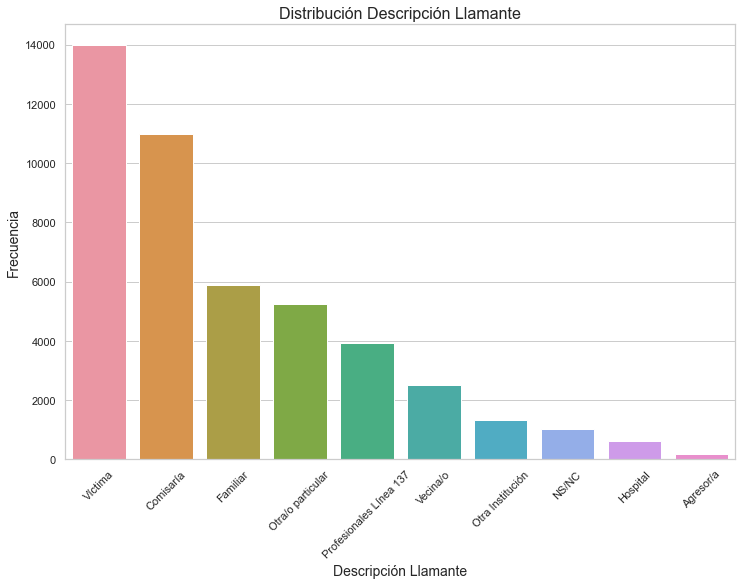

In [10]:
fig = plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamante_descripcion",
    order=linea137_df["llamante_descripcion"].value_counts().index,
)

plt.xlabel("Descripción Llamante", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Distribución Descripción Llamante", size=16)
plt.xticks(rotation=45)
plt.show()


In [11]:
llamadas_totales = 45703
llamadas_victima = 13979
llamadas_comisaria = 10981
llamadas_familiar = 5899
llamadas_otro = 5243
llamadas_137 = 3941
llamadas_vecina = 2507

Porc_llam_vict = (llamadas_victima / llamadas_totales) * 100
Porc_llam_com = (llamadas_comisaria / llamadas_totales) * 100
Porc_llam_fam = (llamadas_familiar / llamadas_totales) * 100
Porc_llam_otro = (llamadas_otro / llamadas_totales) * 100
Porc_llam_137 = (llamadas_137 / llamadas_totales) * 100
Porc_llam_vec = (llamadas_vecina / llamadas_totales) * 100
print(
    "De las",
    llamadas_totales,
    "llamadas totales:\n",
    round(Porc_llam_vict, 2),
    "% fueron hechas por la misma víctima,\n",
    round(Porc_llam_com, 2),
    "% fueron hechas desde la comisaría,\n",
    round(Porc_llam_fam, 2),
    "% fueron hechas por un familiar de la víctima.\n",
    round(Porc_llam_otro, 2),
    "% fueron hechas por otra persona,\n",
    round(Porc_llam_137, 2),
    "% fueron hechas por un profesional de la Línea 137,\n",
    round(Porc_llam_vec, 2),
    "% fueron hechas por una vecina de la víctima.",
)


De las 45703 llamadas totales:
 30.59 % fueron hechas por la misma víctima,
 24.03 % fueron hechas desde la comisaría,
 12.91 % fueron hechas por un familiar de la víctima.
 11.47 % fueron hechas por otra persona,
 8.62 % fueron hechas por un profesional de la Línea 137,
 5.49 % fueron hechas por una vecina de la víctima.


>**Observación:**
>
>- Se puede ver en esta distribución que la mayoría de las llamadas son hechas por la misma víctima.
>- En segundo lugar vienen las llamadas hechas desde la comisaría y en tercer lugar llamadas hechas por un familiar de la víctima.
>- También llaman terceros no familiares de las víctimas, profesionales de la línea 137, o hasta vecinos de las mismas.

<html>
  <h1 align="center";>
  2. Análisis columna <code>llamante_genero</code>
  </h1>
</html>
Describe el género de la persona que realiza el llamado. Puede tomar los valores:

- Masculino
- Femenino
- Trans
- NS/NC: No sabe / No contesta



#### Primero vemos qué valores están tomando cada una de las variables.

In [12]:
linea137_df.llamante_genero.value_counts()


Femenino       29106
Masculino      10332
NS/NC           6235
Transgénero       30
Name: llamante_genero, dtype: int64

Creamos un **histograma** para estudiar la distribución de género del llamante

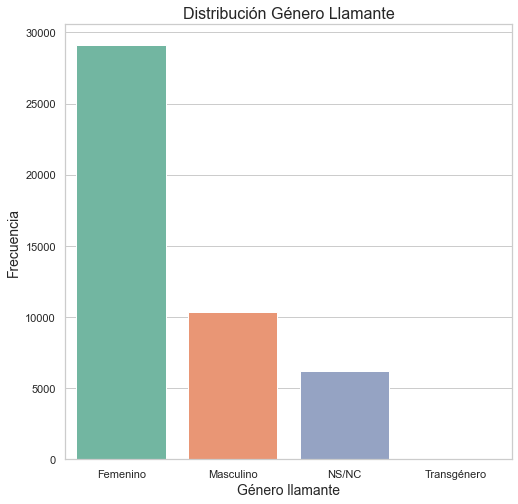

In [13]:
fig = plt.figure(figsize=(8, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamante_genero",
    order=linea137_df["llamante_genero"].value_counts().index,
)

plt.xlabel("Género llamante", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Distribución Género Llamante", size=16)
plt.show()


In [14]:
llamadas_totales = 45703
genero_femenino = 29106
Porc_gen_fem = (genero_femenino / llamadas_totales) * 100
print(
    "De las",
    llamadas_totales,
    "llamadas totales,",
    round(Porc_gen_fem, 2),
    "% fueron hechas por una persona de género femenino.",
)


De las 45703 llamadas totales, 63.69 % fueron hechas por una persona de género femenino.


>**Observación:**
>
>- Se puede ver en esta distribución que la gran mayoría de las llamadas son hechas por una mujer.
>

<html>
  <h1 align="center";>
  3. Análisis columna <code>llamante_vinculo_ninios_presentes</code>
  </h1>
</html>

Describe el vínculo que tiene la persona que realiza el llamado con niños/as presentes en el hecho

#### Primero vemos qué valores están tomando cada una de las variables.

In [15]:
linea137_df.llamante_vinculo_ninios_presentes.value_counts()


No hay niñas/os       10392
Madre                  8153
Otra/o no familiar     7928
NS/NC                  5971
Sin datos              4888
Otro/a no familiar     2701
Otro familiar          1653
Padre                  1642
Otra/o familiar        1495
Hermano/a               653
Hermana/o               198
Padrastro                29
Name: llamante_vinculo_ninios_presentes, dtype: int64

Se entiende con esta variable que se busca saber en primer instancia si hubo niños presentes en el hecho que original la llamada, y si lo hubo, qué relación tienen los niños con la persona que llama.

Se observan datos sucios, repetidos en distinto orden. Por lo tanto **homogeneizamos** y **agrupamos** algunas variables los en primer lugar.

In [16]:
linea137_df["llamante_vinculo_ninios_presentes"] = (
    linea137_df["llamante_vinculo_ninios_presentes"]
    .replace("Otra/o familiar", "Otro/a familiar")
    .replace("Otro familiar", "Otro/a familiar")
)

linea137_df["llamante_vinculo_ninios_presentes"] = linea137_df[
    "llamante_vinculo_ninios_presentes"
].replace("Otra/o no familiar", "Otro/a no familiar")

linea137_df["llamante_vinculo_ninios_presentes"] = linea137_df[
    "llamante_vinculo_ninios_presentes"
].replace("Hermano/a", "Hermana/o")


Quedando de la siguiente manera los datos un poco más limpios:

In [17]:
linea137_df.llamante_vinculo_ninios_presentes.value_counts()


Otro/a no familiar    10629
No hay niñas/os       10392
Madre                  8153
NS/NC                  5971
Sin datos              4888
Otro/a familiar        3148
Padre                  1642
Hermana/o               851
Padrastro                29
Name: llamante_vinculo_ninios_presentes, dtype: int64

Creamos un **histograma** para estudiar la distribución del vínculo del llamante con niñas/os presentes.

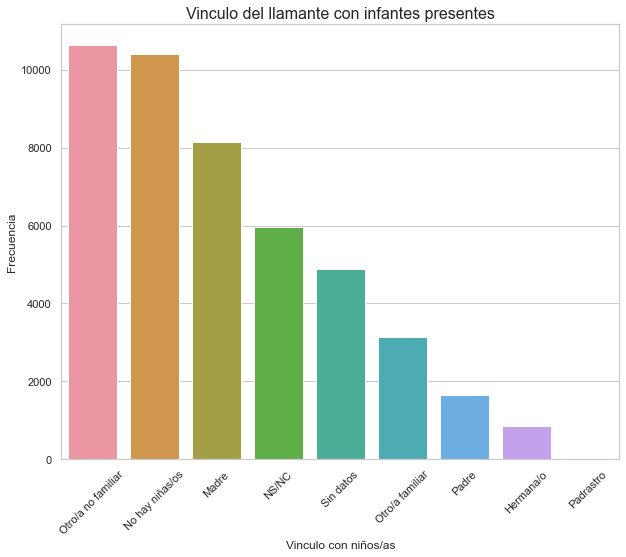

In [18]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamante_vinculo_ninios_presentes",
    order=linea137_df["llamante_vinculo_ninios_presentes"].value_counts().index,
)

plt.xlabel("Vinculo con niños/as", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Vinculo del llamante con infantes presentes", size=16)
plt.xticks(rotation=45)
plt.show()


In [19]:
llamadas_totales = 45703
vinculo_otra = 10629
no_hay = 10392
vinculo_madre = 8153
Porc_vinc_otra = (vinculo_otra / llamadas_totales) * 100
Porc_no_hay = (no_hay / llamadas_totales) * 100
Porc_vinc_mad = (vinculo_madre / llamadas_totales) * 100
print(
    "De las",
    llamadas_totales,
    "llamadas totales:\n",
    round(Porc_vinc_otra, 2),
    "% fueron hechas por personas no familiares de niñas/os presentes,\n",
    round(Porc_no_hay, 2),
    "% fueron hechas sin niños presentes,\n",
    round(Porc_vinc_mad, 2),
    "% fueron hechas por la madre de niñas/os presentes.",
)


De las 45703 llamadas totales:
 23.26 % fueron hechas por personas no familiares de niñas/os presentes,
 22.74 % fueron hechas sin niños presentes,
 17.84 % fueron hechas por la madre de niñas/os presentes.


>**Observación:**
>
>- Se puede observar que en 10629 casos hay niñas/os presentes, pero el llamante no es familiar de las/los niñas/os. 
>- En segundo lugar, en 10392 llamadas directamente no hay niñas/os presentes.
>- Y en tercer lugar el llamante es la madre de llas/los niñas/os presentes, en 8153 casos.




<html>
  <h1 align="center";>
  4. Análisis columna <code>violencia_tipo</code>
  </h1>
</html>

Describe el **tipo de violencia** que se denuncia. Puede tomar los valores:

- Económica y psicológica
- Económica, física y psicológica
- Física y psicológica
- Física, sexual y psicológica
- No aplica
- Psicológica
- Sexual y psicológica
- Sexual, económica y psicológica



#### Primero vemos qué valores están tomando cada una de las variables.

In [20]:
linea137_df.violencia_tipo.value_counts()


Física y psicológica                       21846
Psicológica                                14313
No aplica                                   7435
Física, sexual y psicológica                 390
Económica y psicológica                      389
Económica, física y psicológica              381
No Aplica                                    254
Sexual y psicológica                         250
Otras                                        147
Física, psicológica y económica              143
Económica, Física y psicológica               84
No es un caso de Violencia Familiar           30
Sexual, económica y psicológica               15
Física, sexual, psicológica y económica        6
Name: violencia_tipo, dtype: int64

**Unificamos** algunos datos repetidos.

In [21]:
linea137_df["violencia_tipo"] = (
    linea137_df["violencia_tipo"]
    .replace("No aplica", "No Aplica")
    .replace("No es un caso de Violencia Familiar", "No Aplica")
)

linea137_df["violencia_tipo"] = (
    linea137_df["violencia_tipo"]
    .replace("Física, sexual y psicológica", "Otras")
    .replace("Económica y psicológica", "Otras")
    .replace("Sexual y psicológica", "Otras")
    .replace("Sexual, económica y psicológica", "Otras")
    .replace("Física, sexual, psicológica y económica", "Otras")
)

linea137_df["violencia_tipo"] = (
    linea137_df["violencia_tipo"]
    .replace("Económica, física y psicológica", "Económica, Física y Psicológica")
    .replace("Económica, Física y psicológica", "Económica, Física y Psicológica")
    .replace("Física, psicológica y económica", "Económica, Física y Psicológica")
)


Quedando los datos de la siguiente manera:

In [22]:
linea137_df["violencia_tipo"].value_counts()


Física y psicológica               21846
Psicológica                        14313
No Aplica                           7719
Otras                               1197
Económica, Física y Psicológica      608
Name: violencia_tipo, dtype: int64

Creamos un **histograma** para estudiar la distribución del **tipo de violencia** que se denuncia.

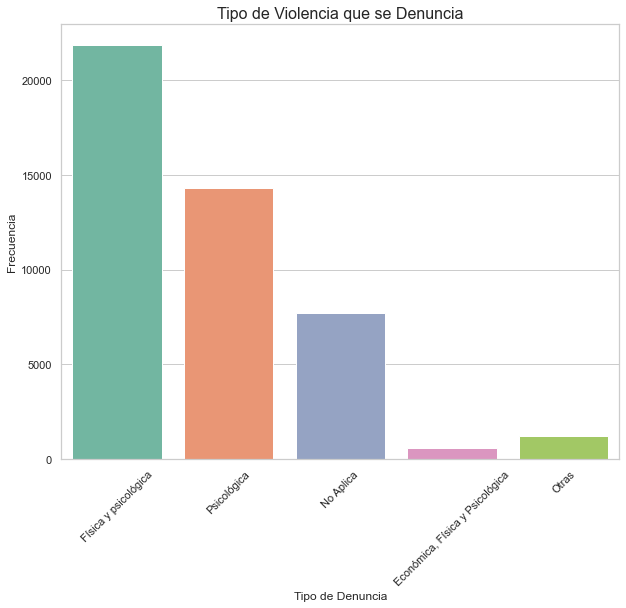

In [23]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(data=linea137_df, x="violencia_tipo")

plt.xlabel("Tipo de Denuncia", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Tipo de Violencia que se Denuncia", size=16)
plt.xticks(rotation=45)
plt.show()


In [24]:
llamadas_totales = 45703
fis_psic = 21846
psic = 14313
no_aplica = 7719
Porc_fis_psic = (fis_psic / llamadas_totales) * 100
Porc_psic = (psic / llamadas_totales) * 100
Porc_no_aplica = (no_aplica / llamadas_totales) * 100
print(
    "De las",
    llamadas_totales,
    "llamadas totales:\n",
    round(Porc_fis_psic, 2),
    "% indicaron violencia física y psicológica del agresor,\n",
    round(Porc_psic, 2),
    "% indicaron solamente violencia psicológica del agresor,\n",
    round(Porc_no_aplica, 2),
    "% no indican ningún tipo de violencia.",
)


De las 45703 llamadas totales:
 47.8 % indicaron violencia física y psicológica del agresor,
 31.32 % indicaron solamente violencia psicológica del agresor,
 16.89 % no indican ningún tipo de violencia.


>**Observación:**
>
>- Se puede observar una clara predominancia de denuncias por violencia de tipo física y psicológica, con 21846 llamadas.
>- En segundo lugar están las denuncias de violencia de tipo psicológica  solamente, con 14313 llamadas.
>- Y en tercer lugar se observa una importante cantidad de casos en el cual no hay violencia.

<html>
  <h1 align="center";>
  5. Análisis columna <code>victima_genero</code>
  </h1>
</html>

Describe el género de la víctima involucrada en el caso denunciado.

#### Primero vemos qué valores están tomando cada una de las variables.

In [25]:
linea137_df.victima_genero.value_counts()


Femenino       30426
NS/NC          10326
Masculino       4895
Transgénero       56
Name: victima_genero, dtype: int64

Creamos un **histograma** para estudiar la distribución de género de la víctima

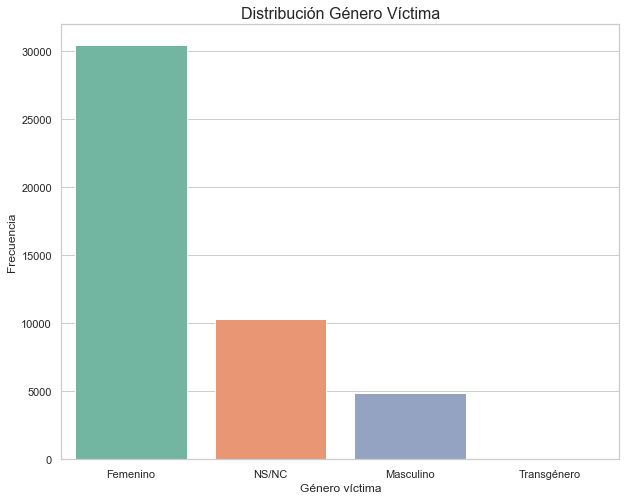

In [26]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="victima_genero",
    order=linea137_df["victima_genero"].value_counts().index,
)

plt.xlabel("Género víctima", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Distribución Género Víctima", size=16)
plt.show()


In [27]:
llamadas_totales = 45703
vict_fem = 30426
ns_nc = 10326
vict_masc = 4895
Porc_vict_fem = (vict_fem / llamadas_totales) * 100
Porc_ns_nc = (ns_nc / llamadas_totales) * 100
Porc_vict_masc = (vict_masc / llamadas_totales) * 100
print(
    "De las",
    llamadas_totales,
    "llamadas totales:\n",
    round(Porc_vict_fem, 2),
    "% indicaron que la víctima es de género femenino,\n",
    round(Porc_ns_nc, 2),
    "% no indica género de víctima,\n",
    round(Porc_vict_masc, 2),
    "% indicaron que la víctima es de género masculino.",
)


De las 45703 llamadas totales:
 66.57 % indicaron que la víctima es de género femenino,
 22.59 % no indica género de víctima,
 10.71 % indicaron que la víctima es de género masculino.


>**Observación:**
>
>- Se puede ver en esta distribución que en la gran mayoría de las llamadas, la víctima es de género femenino. 
>- En segundo lugar hay muchas llamadas que indican género desconocido.
>- En tercer lugar una porción mucho menor de víctimas masculinas.

<html>
  <h1 align="center";>
  6. Análisis columna <code>agresor_genero</code>
  </h1>
</html>

Describe el género del agresor. Puede tomar los valores:

-  Masculino
-  Femenino
-  Trans
-  NS/NC: No sabe / No contesta


In [28]:
linea137_df.agresor_genero.value_counts()


Masculino      28001
NS/NC          10789
Femenino        6899
Transgénero       14
Name: agresor_genero, dtype: int64

Creamos un **histograma** para estudiar la distribución de género del agresor.

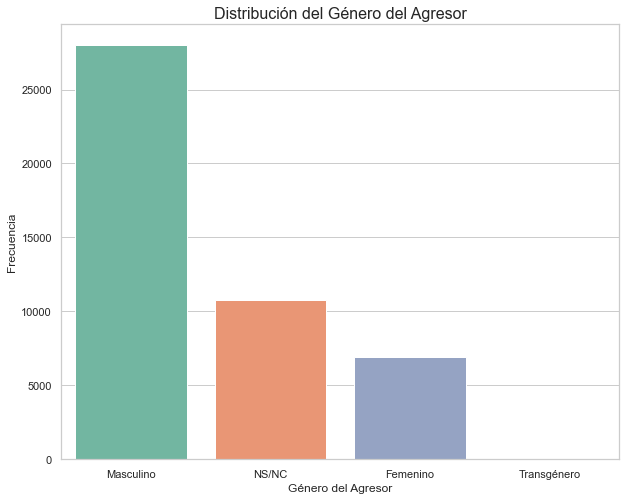

In [29]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="agresor_genero",
    order=linea137_df["agresor_genero"].value_counts().index,
)

plt.xlabel("Género del Agresor", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Distribución del Género del Agresor", size=16)
plt.show()


In [30]:
llamadas_totales = 45703
agr_masc = 28001
ns_nc = 10789
agr_fem = 6899
Porc_agr_masc = (agr_masc / llamadas_totales) * 100
Porc_ns_nc = (ns_nc / llamadas_totales) * 100
Porc_agr_fem = (agr_fem / llamadas_totales) * 100
print(
    "De las",
    llamadas_totales,
    "llamadas totales:\n",
    round(Porc_agr_masc, 2),
    "% indicaron que el agresor es de género masculino,\n",
    round(Porc_ns_nc, 2),
    "% no indica género de víctima,\n",
    round(Porc_agr_fem, 2),
    "% indicaron que el agresor es de género femenino.",
)


De las 45703 llamadas totales:
 61.27 % indicaron que el agresor es de género masculino,
 23.61 % no indica género de víctima,
 15.1 % indicaron que el agresor es de género femenino.


>**Observación:**
>
>- Observamos en esta distribución que en la gran mayoría de las llamadas, el agresor es de género masculino. 
>- En segundo lugar hay muchas llamadas que indican género desconocido.
>- En tercer lugar una porción mucho menor de agresores de género femenino. Una situación casi opuesta a la del género de la víctima.

<html>
  <h1 align="center";>
  7. Análisis columna <code>agresor_relacion_victima</code>        
  </h1>
</html>

Describe el vínculo que existe entre el agresor y la víctima involucrada en el caso, es decir indica la relación del **agresor** para con su víctima.


#### Primero vemos qué valores están tomando cada una de las variables.

In [31]:
linea137_df.agresor_relacion_victima.value_counts()


Pareja                   11958
NS/NC                    10587
Ex pareja                 8932
Madre                     3875
Padre                     3272
Hijo/a                    2819
Hermano/a                 1526
Otro/a no conviviente     1139
Otro/a conviviente         783
Padrastro                  599
Abuelo/a                   174
Hermana/o                   26
Madrastra                   13
Name: agresor_relacion_victima, dtype: int64

**Unificamos** algunos datos repetidos

In [32]:
linea137_df["agresor_relacion_victima"] = linea137_df[
    "agresor_relacion_victima"
].replace("Hermana/o", "Hermano/a")

linea137_df.agresor_relacion_victima.value_counts()


Pareja                   11958
NS/NC                    10587
Ex pareja                 8932
Madre                     3875
Padre                     3272
Hijo/a                    2819
Hermano/a                 1552
Otro/a no conviviente     1139
Otro/a conviviente         783
Padrastro                  599
Abuelo/a                   174
Madrastra                   13
Name: agresor_relacion_victima, dtype: int64

Creamos un **histograma** para estudiar la distribución de la Relación con Agresor y la Víctima.

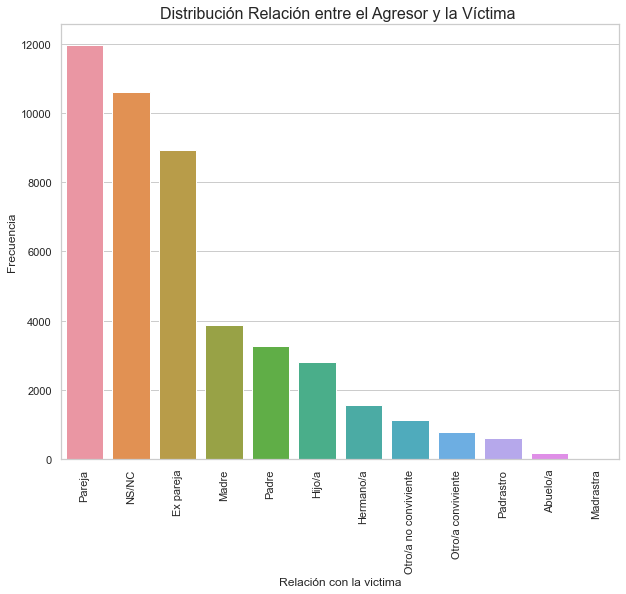

In [33]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="agresor_relacion_victima",
    order=linea137_df["agresor_relacion_victima"].value_counts().index,
)

plt.xlabel("Relación con la victima", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Distribución Relación entre el Agresor y la Víctima ", size=16)
plt.xticks(rotation=90)
plt.show()


In [34]:
llamadas_totales = 45703
pareja = 11958
ns_nc = 10789
expareja = 8932
Porc_pareja = (pareja / llamadas_totales) * 100
Porc_ns_nc = (ns_nc / llamadas_totales) * 100
Porc_expareja = (expareja / llamadas_totales) * 100
print(
    "De las",
    llamadas_totales,
    "llamadas totales:\n",
    round(Porc_pareja, 2),
    "% indicaron que el agresor es pareja de la víctima,\n",
    round(Porc_ns_nc, 2),
    "% no indica relación del agresor con la víctima,\n",
    round(Porc_expareja, 2),
    "% indicaron que el agresor es ex-pareja de la víctima.",
)


De las 45703 llamadas totales:
 26.16 % indicaron que el agresor es pareja de la víctima,
 23.61 % no indica relación del agresor con la víctima,
 19.54 % indicaron que el agresor es ex-pareja de la víctima.


>**Observación:**
>
>- Se puede ver de esta manera que la gran mayoría de los agresores son o pareja actual - 11958 - o ex-parejas - 8932
>- Otra gran porción se la lleva el dato NS/NC.

<html>
  <h1 align="center";>
  8. Análisis columna <code>llamado_derivacion</code>
  </h1>
</html>

Acciones que se llevaron a cabo en el centro de llamados de la Línea 137.

#### Primero vemos qué valores están tomando cada una de las variables.

In [35]:
linea137_df.llamado_derivacion.value_counts()


Llamante solicitó información y/o orientación                             22284
La víctima no aceptó la intervención del Equipo Móvil                      5185
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA       4495
Se trata de un conflicto familiar                                          3735
Comunicación con Equipos Móviles                                           2953
No había móviles y/o Equipos para realizar la intervención                 2248
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s     2121
Se planificó intervención para otro momento                                 926
Comunicación con los Equipos Móviles                                        915
Está interviniendo o se deriva a otra institución                           779
Otras                                                                        62
Name: llamado_derivacion, dtype: int64

**Unificación** de los datos repetidos

In [36]:
linea137_df["llamado_derivacion"] = linea137_df["llamado_derivacion"].replace(
    "Comunicación con Equipos Móviles", "Comunicación con los Equipos Móviles"
)

linea137_df.llamado_derivacion.value_counts()


Llamante solicitó información y/o orientación                             22284
La víctima no aceptó la intervención del Equipo Móvil                      5185
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA       4495
Comunicación con los Equipos Móviles                                       3868
Se trata de un conflicto familiar                                          3735
No había móviles y/o Equipos para realizar la intervención                 2248
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s     2121
Se planificó intervención para otro momento                                 926
Está interviniendo o se deriva a otra institución                           779
Otras                                                                        62
Name: llamado_derivacion, dtype: int64

Creamos un **histograma** para estudiar las Acciones realizadas en el centro de llamados a la Línea 137

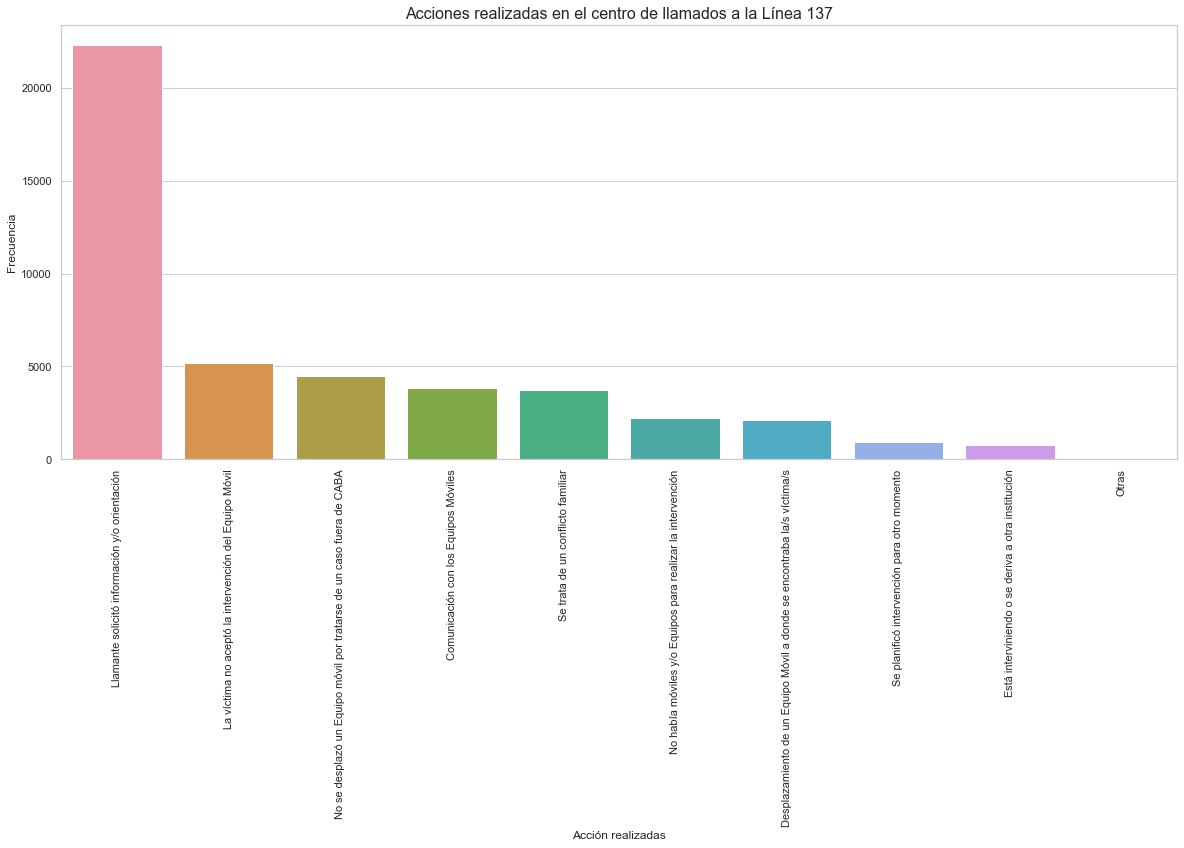

In [37]:
fig = plt.figure(figsize=(20, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamado_derivacion",
    order=linea137_df["llamado_derivacion"].value_counts().index,
)

plt.xlabel("Acción realizadas", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Acciones realizadas en el centro de llamados a la Línea 137", size=16)
plt.xticks(rotation=90)
plt.show()


In [38]:
llamadas_totales = 45703
solo_info = 22284
no_acepta = 5185
Porc_solo_info = (solo_info / llamadas_totales) * 100
Porc_no_acepta = (no_acepta / llamadas_totales) * 100
print()
print(
    "De las",
    llamadas_totales,
    "llamadas totales,",
    round(Porc_solo_info, 2),
    "% fueron sólo para pedir información u orientación, sin generar ninguna acción por parte del personal del 137 o policial.",
)
print(
    "Por otro lado,",
    no_acepta,
    "llamantes, es decir",
    round(Porc_no_acepta, 2),
    "%, no aceptan la intervención, aunque se haya considerado necesaria.",
)



De las 45703 llamadas totales, 48.76 % fueron sólo para pedir información u orientación, sin generar ninguna acción por parte del personal del 137 o policial.
Por otro lado, 5185 llamantes, es decir 11.34 %, no aceptan la intervención, aunque se haya considerado necesaria.


>**Observación:**
>
>- En la gran maryoría de los casos no se genera ninguna acción concreta luego de la llamada, sino el llamante sólo pide información y/o orientación respecto a alguna determinada situación.
>- Luego hay varios casos en los que se solicita algún tipo de intervención, o en los que se sugiere intervención pero víctima no lo acepta (5185).


<html>
<hr>
  <h1 align="center";>
  Variable Aleatoria Numéricas
  </h1>
<hr>
</html>

<html>
  <h1 align="center";>
  Análisis columna <code>victima_cantidad</code>  (9)   
  </h1>
</html>

#### Primero vemos qué valores están tomando cada una de las variables.

In [39]:
linea137_df["victima_cantidad"].describe().round(2)


count    45703.00
mean         1.37
std          1.19
min          0.00
25%          1.00
50%          1.00
75%          2.00
max         13.00
Name: victima_cantidad, dtype: float64

In [40]:
linea137_df["victima_cantidad"].value_counts()


1     23556
0      8161
2      7192
3      4091
4      1689
5       605
6       242
7        91
8        41
9        14
10       13
11        4
13        2
12        2
Name: victima_cantidad, dtype: int64

La **Media**:

In [41]:
linea137_df["victima_cantidad"].mean()


1.3732358926109884

La **Mediana**:




In [42]:
linea137_df["victima_cantidad"].median()


1.0

Graficamos el **histograma** de frecuencia con media y mediana indicada.

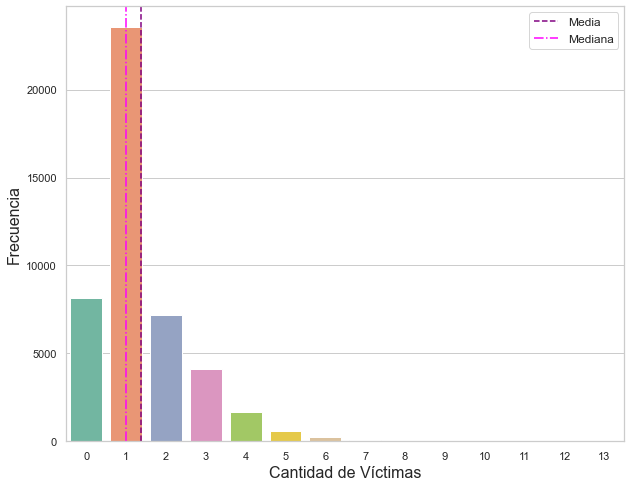

In [43]:
fig = plt.figure(figsize=(10, 8))


sns.countplot(data=linea137_df, x="victima_cantidad", palette="Set2")


# Agregamos la lineas de la media
plt.axvline(
    x=linea137_df.victima_cantidad.mean(), linestyle="--", color="purple", label="Media"
)

# Agregamos la lineas de la mediana
plt.axvline(
    x=linea137_df.victima_cantidad.median(),
    linestyle="-.",
    color="magenta",
    label="Mediana",
)

plt.legend(prop={"size": "medium"})
plt.xlabel("Cantidad de Víctimas", size=16)
plt.ylabel("Frecuencia", size=16)
plt.ticklabel_format(axis="y", style="plain", scilimits=(-3, 3), useOffset=False)
plt.show()


>**Observación:**
>
>- En la gran mayoría de los casos, la víctima es una sola.

<html>
  <h1 align="center";>
  Análisis columna <code>agresor_cantidad</code> (10)     
  </h1>
</html>

Describe el número de agresores involucrados en el caso

#### Primero vemos qué valores están tomando cada una de las variables.

In [44]:
linea137_df["agresor_cantidad"].describe().round(2)


count    45703.00
mean         0.88
std          0.56
min          0.00
25%          1.00
50%          1.00
75%          1.00
max         51.00
Name: agresor_cantidad, dtype: float64

In [45]:
linea137_df["agresor_cantidad"].value_counts()


1     34839
0      8302
2      2260
3       226
4        58
5        15
51        1
7         1
6         1
Name: agresor_cantidad, dtype: int64

La **Media**:

In [46]:
linea137_df["agresor_cantidad"].mean()


0.8841432728704899

La **Mediana**:

In [47]:
linea137_df["agresor_cantidad"].median()


1.0

Graficamos el **histograma** de frecuencia con media y mediana indicada.

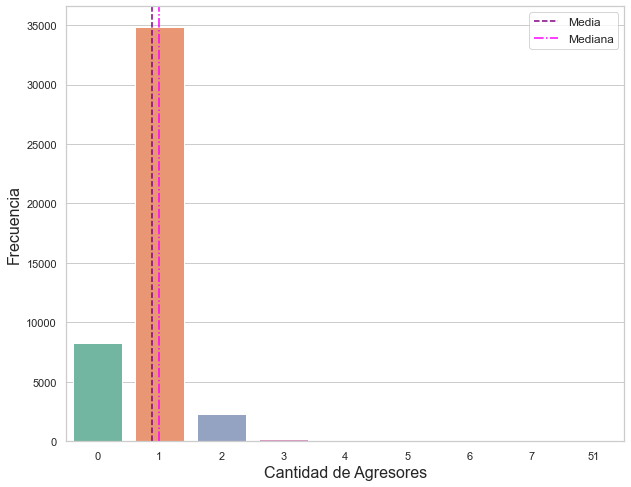

In [48]:
fig = plt.figure(figsize=(10, 8))


sns.countplot(data=linea137_df, x="agresor_cantidad", palette="Set2")


# Agregamos la lineas de la media
plt.axvline(
    x=linea137_df.agresor_cantidad.mean(), linestyle="--", color="purple", label="Media"
)

# Agregamos la lineas de la mediana
plt.axvline(
    x=linea137_df.agresor_cantidad.median(),
    linestyle="-.",
    color="magenta",
    label="Mediana",
)

plt.legend(prop={"size": "medium"})
plt.xlabel("Cantidad de Agresores", size=16)
plt.ylabel("Frecuencia", size=16)
plt.ticklabel_format(axis="y", style="plain", scilimits=(-3, 3), useOffset=False)
plt.show()


**Observación:**
>- En la gran mayoría de los casos el agresor es uno solo.


<html>
<hr>
  <h1 align="center";>
  Relaciones relevantes
  </h1>
  <hr>
</html>

Luego de analizar las variables de manera individual para conocer un poco mas los datos, nos interesa explorar las relaciones entre:

a. **Género víctima** versus **Género agresor**

b. **Llamante** y **derivación** de la llamada

c. **Cantidad de víctimas** versus **Cantidad de agresores**


<html>
  <h1 align="center";>
  a. Género Víctima vs Género Agresor
  </h1>
</html>

Creamos una tabla de contingencia entre genero víctima y género agresor

In [49]:
tabla_contingencia2 = pd.crosstab(
    linea137_df.agresor_genero, linea137_df.victima_genero
)
tabla_contingencia2


victima_genero,Femenino,Masculino,NS/NC,Transgénero
agresor_genero,,,,
Femenino,4215,2250,420,14
Masculino,25072,2255,639,35
NS/NC,1132,387,9266,4
Transgénero,7,3,1,3


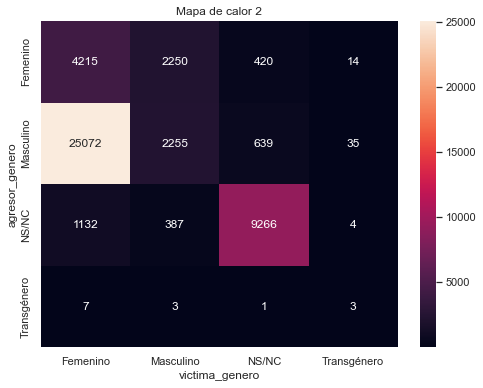

In [50]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(tabla_contingencia2, annot=True, fmt="g")
plt.title("Mapa de calor 2")
plt.show()


>**Observación:**
>
> Se observa que en la gran mayoría de los casos, la víctima es femenina y el agresor masculino (25072 casos de los 45703).

<html>
  <h1 align="center";>
  b. Llamante y derivación de la llamada
  </h1>
</html>

#### Analizamos la cantidad de víctimas por el llamante de género y su derivación.

Utilizamos el método `pivot_table` para analizar la relación entre ellas donde el valor del argumento de `aggfunc` es el `count`. 

In [51]:
linea137_df.pivot_table(
    "victima_cantidad",
    index="llamante_genero",
    columns="llamado_derivacion",
    aggfunc="count",
    margins=True,
    margins_name="Total",
)


llamado_derivacion,Comunicación con los Equipos Móviles,Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s,Está interviniendo o se deriva a otra institución,La víctima no aceptó la intervención del Equipo Móvil,Llamante solicitó información y/o orientación,No había móviles y/o Equipos para realizar la intervención,No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA,Otras,Se planificó intervención para otro momento,Se trata de un conflicto familiar,Total
llamante_genero,,,,,,,,,,,
Femenino,21.0,1465.0,609.0,3316.0,15593.0,1490.0,3591.0,3.0,654.0,2364.0,29106
Masculino,4.0,565.0,162.0,1838.0,4960.0,744.0,835.0,1.0,262.0,961.0,10332
NS/NC,3843.0,91.0,8.0,25.0,1718.0,14.0,65.0,58.0,10.0,403.0,6235
Transgénero,NaN,NaN,NaN,6.0,13.0,NaN,4.0,NaN,NaN,7.0,30
Total,3868.0,2121.0,779.0,5185.0,22284.0,2248.0,4495.0,62.0,926.0,3735.0,45703


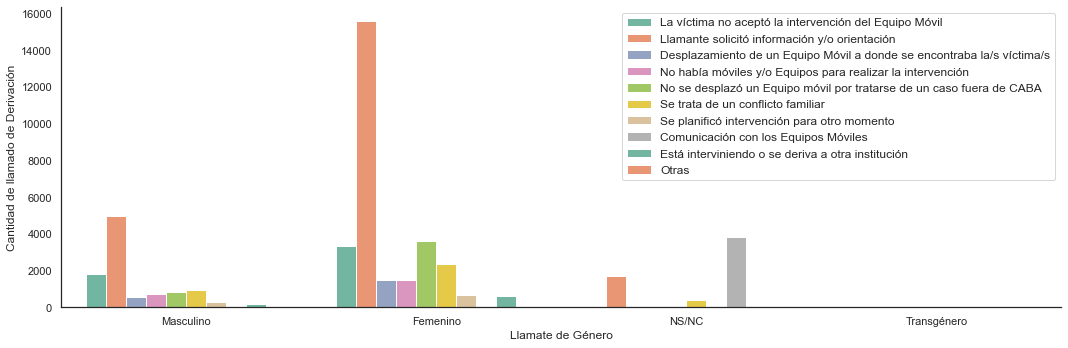

In [52]:
with sns.axes_style("white"):
    g = sns.catplot(
        x="llamante_genero",
        data=linea137_df,
        aspect=3.0,
        kind="count",
        palette="Set2",
        hue="llamado_derivacion",
        legend=False,
    )
    g.set_ylabels("Cantidad de llamado de Derivación")
    g.set_xlabels("Llamate de Género")
    plt.legend(loc="upper right", prop={"size": "medium"})
    sns.despine()
    plt.show()


>**Observación:**
>
>- La mayoría de las derivaciónes son realizadas por el género Femenino donde el mayor caso la llamante solicitó información y/o orientación. 
>- La mayoria de las llamadas realizadas por el género Masculino y Transgénero solicitó información y/o orientación.  

<html>
  <h1 align="center";>
  c. Cantidad de víctimas vs Cantidad de agresores
  </h1>
</html>

Para tener un pantallazo de los datos, vamos a calcular el rango de las variables.

Calcularemos el valor mínimo, el máximo, el rango, algunos percentiles, así como el rango intercuartílico para cada una de las variables.

Además, utilizaremos el método `unique()` para conocer los valores posibles de cada variable.

In [53]:
cols = ["victima_cantidad", "agresor_cantidad"]

ranges = pd.DataFrame()
ranges["min"] = linea137_df[cols].min()
ranges["max"] = linea137_df[cols].max()
ranges["std"] = linea137_df[cols].std()
ranges["range"] = ranges["max"] - ranges["min"]
ranges["q25"] = linea137_df[cols].quantile(0.25)
ranges["q50"] = linea137_df[cols].quantile(0.50)
ranges["q70"] = linea137_df[cols].quantile(0.70)
ranges["q75"] = linea137_df[cols].quantile(0.75)
ranges["range_intercuartil"] = ranges["q75"] - ranges["q25"]
ranges["count"] = linea137_df[cols].count()
ranges


,min,max,std,range,q25,q50,q70,q75,range_intercuartil,count
victima_cantidad,0,13,1.187485,13,1.0,1.0,2.0,2.0,1.0,45703
agresor_cantidad,0,51,0.556932,51,1.0,1.0,1.0,1.0,0.0,45703


Vemos que hay un outlier, valor 51, el cual procedemos a eliminar

In [54]:
linea137_limpia_df = linea137_df[(linea137_df.agresor_cantidad < 51)]


Realizamos una Tabla de contingencia

In [55]:
tabla_contingencia1 = pd.crosstab(
    linea137_limpia_df.victima_cantidad, linea137_limpia_df.agresor_cantidad
)
tabla_contingencia1


agresor_cantidad,0,1,2,3,4,5,6,7
victima_cantidad,,,,,,,,
0,7992,154,12,1,1,1,0,0
1,191,21839,1346,133,37,8,1,0
2,71,6605,464,44,6,1,0,1
3,27,3776,260,21,6,1,0,0
4,11,1560,97,15,3,3,0,0
5,5,545,48,6,1,0,0,0
6,2,213,20,4,3,0,0,0
7,2,80,8,1,0,0,0,0
8,1,38,2,0,0,0,0,0


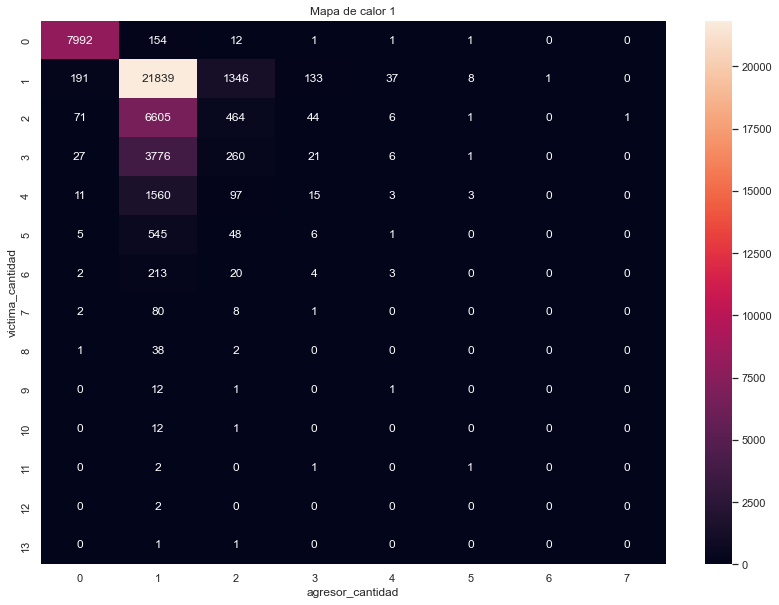

In [56]:
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(tabla_contingencia1, annot=True, fmt="g")
plt.title("Mapa de calor 1")
plt.show()


In [57]:
[linea137_df.victima_cantidad.unique()] + [linea137_df.agresor_cantidad.unique()]


[array([ 3,  2,  1,  4,  6,  0,  5,  7,  8, 10,  9, 11, 13, 12],
       dtype=int64),
 array([ 1,  0,  3,  2,  4,  5, 51,  7,  6], dtype=int64)]

Podemos hacer tambien un análisis de la cantidad máxima de agresores y de víctimas a los largo de los años, se tiene en cuenta que el 2022 tendrá menos datos debido a que es el año en curso.



Se crea una nueva columna, solo con los años.

In [ ]:
linea137_limpia_df["llamado_fecha_anio"] = pd.to_datetime(
    linea137_limpia_df["llamado_fecha"]
).dt.year;


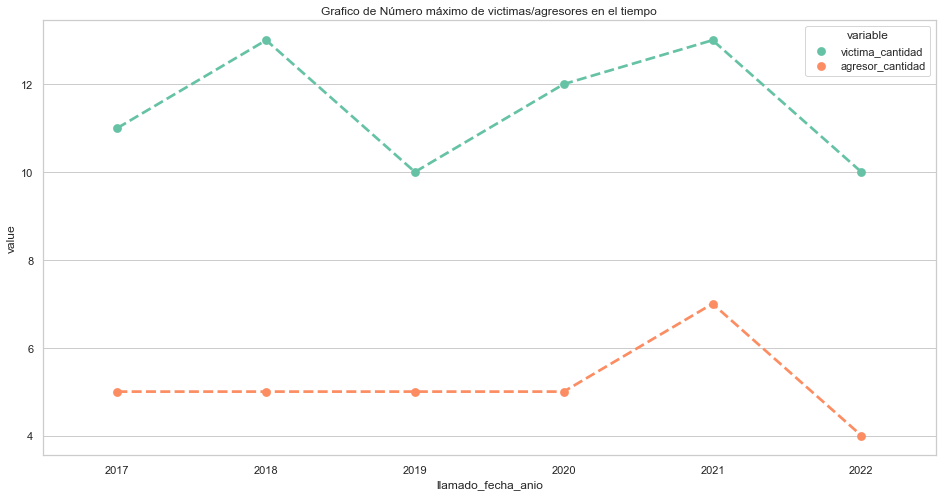

In [59]:
fig = plt.figure(figsize=(16, 8))
data = linea137_limpia_df[
    ["llamado_fecha_anio", "victima_cantidad", "agresor_cantidad"]
]

sp1 = plt.subplot(1, 1, 1)
sp1.set_title("Grafico de Número máximo de victimas/agresores en el tiempo")
sns.pointplot(
    x="llamado_fecha_anio",
    y="value",
    data=pd.melt(
        data, ["llamado_fecha_anio"], ["victima_cantidad", "agresor_cantidad"]
    ),
    hue="variable",
    ci=None,
    estimator=numpy.max,
    markers="o",
    linestyles="--",
    ax=sp1,
)
plt.show()


>**Observación:**
>
>Se observa que para la cantidad  maxima de agresores, hubo un salto importante en el año 2021, además se puede ver que hay una mayor cantidad de victimas que de agresores.
>
>Se puede tener informacion de la media de la cantidad de victimas y agresores, que se corresponde con el cálculo del rango de valores que se realizó anteriormente

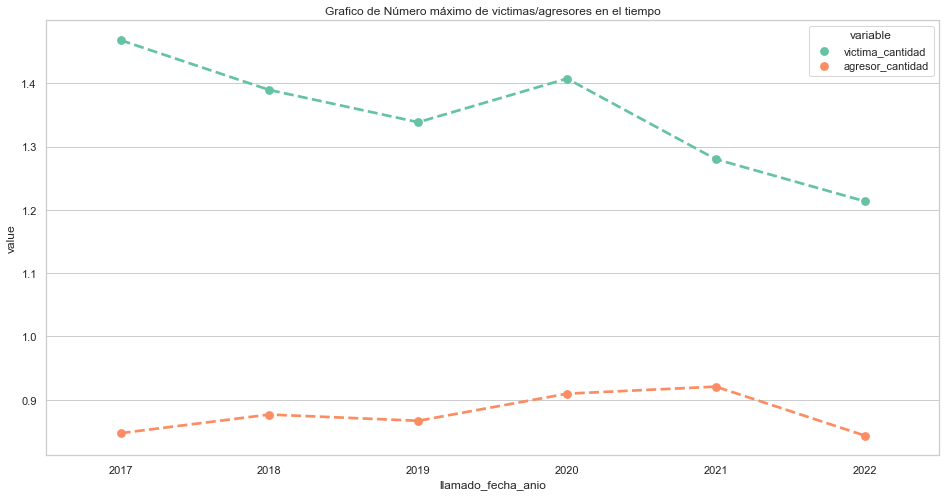

In [60]:
fig = plt.figure(figsize=(16, 8))
data = linea137_limpia_df[
    ["llamado_fecha_anio", "victima_cantidad", "agresor_cantidad"]
]

sp1 = plt.subplot(1, 1, 1)
sp1.set_title("Grafico de Número máximo de victimas/agresores en el tiempo")
sns.pointplot(
    x="llamado_fecha_anio",
    y="value",
    data=pd.melt(
        data, ["llamado_fecha_anio"], ["victima_cantidad", "agresor_cantidad"]
    ),
    hue="variable",
    ci=None,
    estimator=numpy.mean,
    markers="o",
    linestyles="--",
    ax=sp1,
)
plt.show()


Es interesante también observar la relación Victima/Agresor, teniendo en cuenta el género de la Victima

<Figure size 1152x576 with 0 Axes>

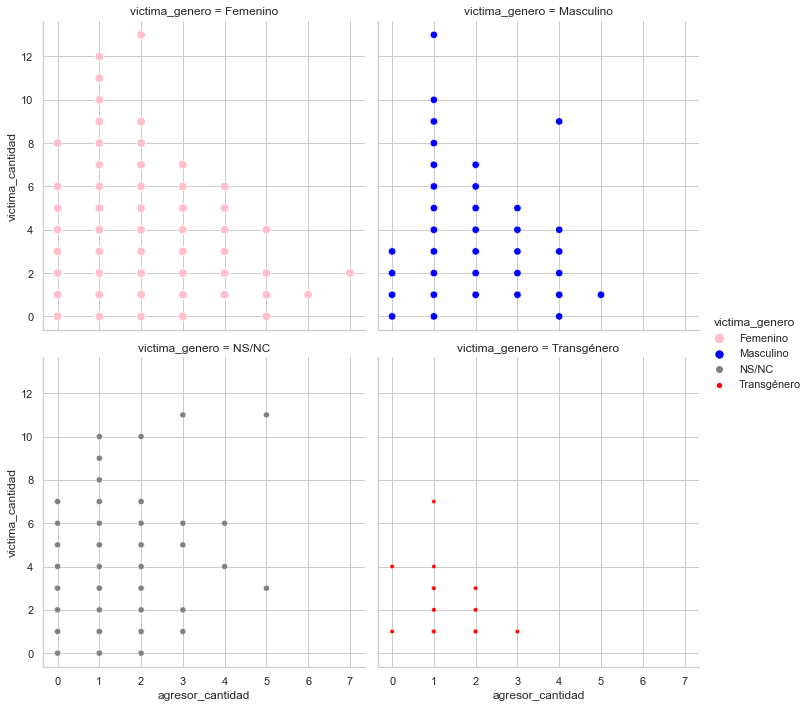

In [61]:
fig = plt.figure(figsize=(16, 8))
hue_colors = {
    "Femenino": "Pink",
    "Masculino": "Blue",
    "NS/NC": "gray",
    "Transgénero": "Red",
}
# Se definen los colores que van a representar a cada categoria

sns.relplot(
    x="agresor_cantidad",
    y="victima_cantidad",
    data=linea137_limpia_df,
    kind="scatter",
    col="victima_genero",
    col_wrap=2,
    palette=hue_colors,
    hue="victima_genero",
    size="victima_genero",
)
plt.show()


**Observación:**
>- Se puede ver que en general, hay una mayor cantidad de victimas de género Femenino y la relación mas predominante de víctima/agresor es de uno a uno.

<html>
<hr>
  <h1 align="center";>
  Conclusión
  </h1>
  <hr>
</html>

Nos encontramos frente a una base de datos de información recopilada or profesionales de la línea 137 de Víctimas de Violencia Familiar, desde Enero 2017 hasta Febrero 2022.

La base de datos obtenida contiene la información de un total de 45703 llamadas en el período mencionado y se dispone en ella de 13 columnas con datos, de las cuales se analizaron 10:

1. `llamante_descripcion`
2. `llamante_genero`
3. `llamante_vinculo_ninios_presentes`
4. `violencia_tipo`
5. `victima_genero`
6. `agresor_genero`
7. `agresor_relacion_victima`
8. `llamado_derivacion`
9. `victima_cantidad`
10. `agresor_cantidad`

Por el momento no se analizaron las siguientes columnas:

- `fecha`
- `hora de la llamada`

El propósito es conocer un poco los datos, detectar outliers, y empezar a explorar relaciones entre los mismos.

Al analizar los datos se observa de manera resumida lo siguiente:

- La mayoría de las llamadas a la Línea 137 son hechas por las mismas víctimas que son predominantemente del género femenino. Respecto al involucramiento o no de niñas/os en estos casos, se observa una distribución semejante entre niñas/os que son hijos del llamante, casos en los que se desconoce si hay niñas/os, y casos en los que se conoce que no hay niñas/os involucrados o presentes en los hechos denunciados.

- La violencia denunciada suele ser física y psicológica y el agresor, más frecuentemente de género masculino, suele ser la pareja o ex-pareja de la víctima.

- La mayoría de las llamadas no llevan a ninguna acción por parte de la Línea 137 o de la policía, sino que se centran en el pedido de información u orientación. Por lo general hay una única víctima y un único agresor.